/home/robby/miniconda3/envs/myocr/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
INFO:root:Onnx model /home/robby/.MyOCR/models/dbnet++.onnx loaded to cuda:0


执行时间: 0.2815549373626709 秒


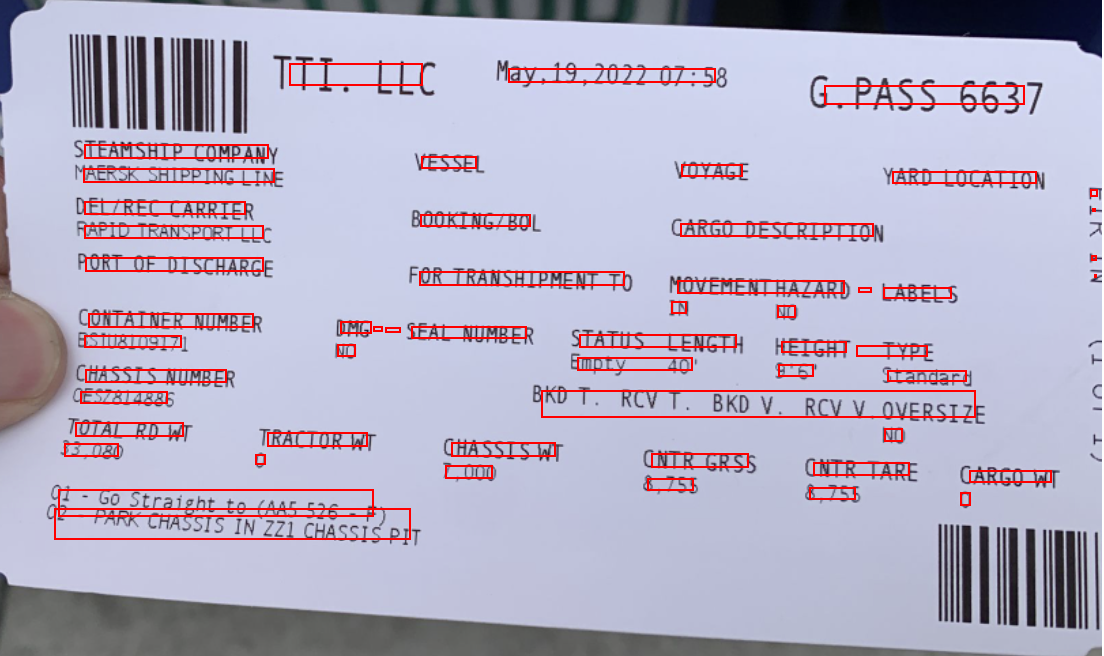

In [1]:
import time

import torch
from PIL import Image,ImageDraw
from myocr.config import MODEL_PATH
from myocr.models.model import ModelZoo
from myocr.predictors.text_detection_predictor import TextDetectionParamConverter

model = ModelZoo.load_model("onnx", MODEL_PATH+"dbnet++.onnx", "cuda:0" if torch.cuda.is_available() else "cpu")
p = model.predictor(TextDetectionParamConverter(model.device))
orig_image = Image.open("/home/robby/code/doctype-classification/training/dataset/train/in/bbfc97c6-cfba-402e-a5b2-3e29fd86f5d3.png").convert("RGB")
start_time = time.time()
detected = p.predict(orig_image)
end_time = time.time()  
print(f"执行时间: {end_time - start_time} 秒")

draw = ImageDraw.Draw(orig_image)
for box in detected.boxes: # type: ignore
    draw.polygon(
        [(x, y) for (x, y) in box],
        outline="red",
        width=2,
    )

display(orig_image)